In [1]:
using JupyterFormatter
enable_autoformat();

In [2]:
using DataFrames: Not
using LinearAlgebra: Diagonal, diag
using Plots
using Random
using StatsBase
using Test: @testset, @test

include("../src/Simulation.jl")
using .Simulation

# Model

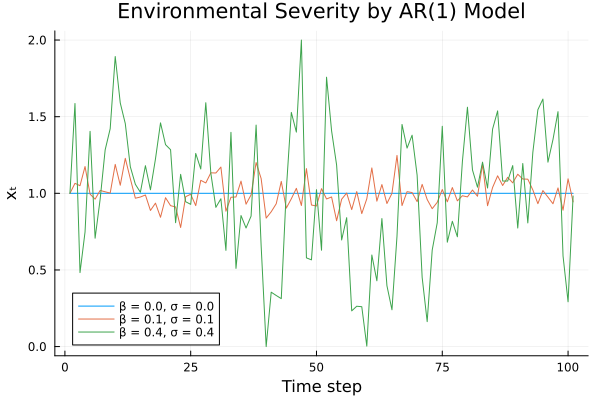

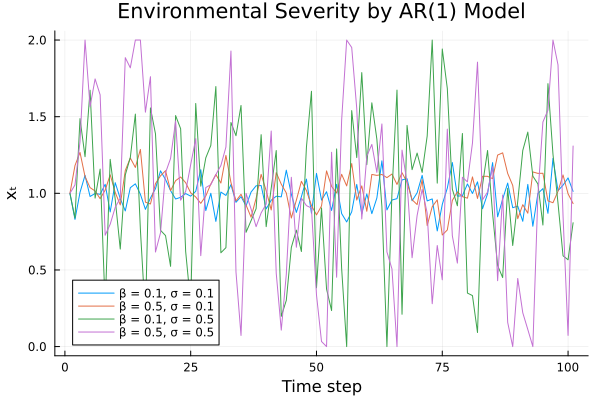

In [3]:
function plot_process(params::Vector)::Plots.Plot
    T = 100
    p = plot(
        xlabel = "Time step",
        ylabel = "xₜ",
        title = "Environmental Severity by AR(1) Model",
    )

    for (β, σ) in params
        plot!(Simulation.ar1_model(β, σ, T), label = "β = $(β), σ = $(σ)")
    end

    return p
end

display(plot_process([(0.0, 0.0), (0.1, 0.1), (0.4, 0.4)]))
display(plot_process([(0.1, 0.1), (0.5, 0.1), (0.1, 0.5), (0.5, 0.5)]))

# death_and_birth!

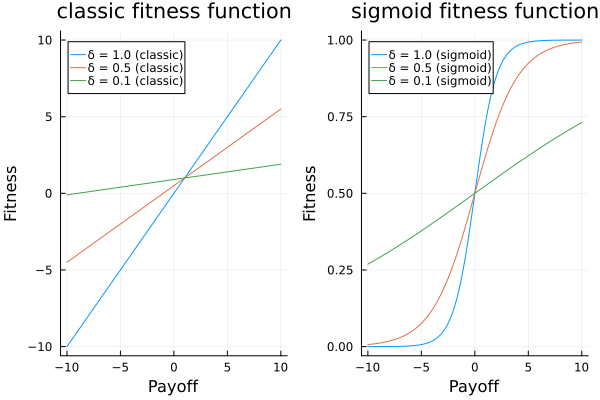

In [10]:
π_vec = -10.0:0.1:10.0

p_classic = plot(title = "classic fitness function", xl = "Payoff", yl = "Fitness")

δ = 1.0
f_vec = [Simulation.classic_fitness(π, δ) for π in π_vec]
plot!(π_vec, f_vec, label = "δ = $(δ) (classic)")

δ = 0.5
f_vec = [Simulation.classic_fitness(π, δ) for π in π_vec]
plot!(π_vec, f_vec, label = "δ = $(δ) (classic)")

δ = 0.1
f_vec = [Simulation.classic_fitness(π, δ) for π in π_vec]
plot!(π_vec, f_vec, label = "δ = $(δ) (classic)")

p_sigmoid = plot(title = "sigmoid fitness function", xl = "Payoff", yl = "Fitness")

δ = 1.0
f_vec = [Simulation.sigmoid_fitness(π, δ) for π in π_vec]
plot!(π_vec, f_vec, label = "δ = $(δ) (sigmoid)")

δ = 0.5
f_vec = [Simulation.sigmoid_fitness(π, δ) for π in π_vec]
plot!(π_vec, f_vec, label = "δ = $(δ) (sigmoid)")

δ = 0.1
f_vec = [Simulation.sigmoid_fitness(π, δ) for π in π_vec]
plot!(π_vec, f_vec, label = "δ = $(δ) (sigmoid)")

plot(p_classic, p_sigmoid)

## pick_deaths and pick_parents

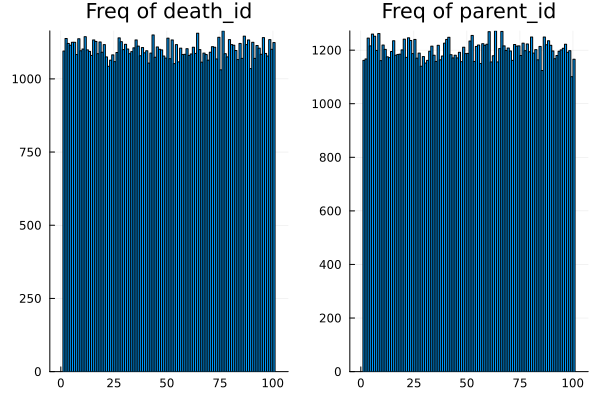

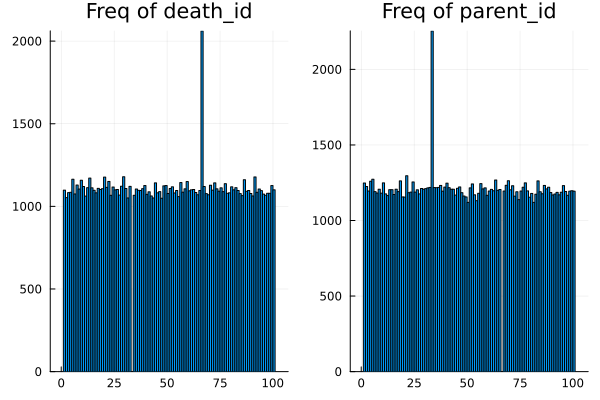

In [13]:
# uniform distribution
model = Model(Param(initial_N = 100))

# pick_deaths
death_id_vec_vec = [Simulation.pick_deaths(model, 11) for _ = 1:10_000]
death_id_vec = vcat(death_id_vec_vec...)

p_death = histogram(death_id_vec, bins = 100, title = "Freq of death_id", label = false)

# pick_parents
parent_id_vec_vec = [Simulation.pick_parents(model, 12) for _ = 1:10_000]
parent_id_vec = vcat(parent_id_vec_vec...)

p_parent = histogram(parent_id_vec, bins = 100, title = "Freq of parent_id", label = false)

display(plot(p_death, p_parent))

# polarized situation
model = Model(Param(initial_N = 100, δ = 1.0))
model.payoff_vec[33] = 100
model.payoff_vec[66] = -100

# pick_deaths
death_id_vec_vec = [Simulation.pick_deaths(model, 11) for _ = 1:10_000]
death_id_vec = vcat(death_id_vec_vec...)

p_death = histogram(death_id_vec, bins = 100, title = "Freq of death_id", label = false)

# pick_parents
parent_id_vec_vec = [Simulation.pick_parents(model, 12) for _ = 1:10_000]
parent_id_vec = vcat(parent_id_vec_vec...)

p_parent = histogram(parent_id_vec, bins = 100, title = "Freq of parent_id", label = false)

display(plot(p_death, p_parent))